<a href="https://colab.research.google.com/github/lubaochuan/ml_python/blob/main/HOML_chapter5_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 5: Support Vector Machines (SVMs)

**Textbook:** *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow (3rd ed.)*  

## goals

- Explain what an SVM is trying to do (maximize the margin).
- Train **Linear SVM** classifiers and understand **soft margin** (the `C` hyperparameter).
- Use **kernel SVMs** (RBF and polynomial) and interpret `gamma` and `C`.

**Name:**

**Date:**


## 0) Setup

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, load_breast_cancer, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.svm import SVC, LinearSVC

np.random.seed(42)

print("NumPy:", np.__version__)
print("Pandas:", pd.__version__)

NumPy: 2.0.2
Pandas: 2.2.2


## 1) Explore a dataset (start simple): Iris (2 classes, 2 features)

We begin with the classic **Iris** dataset, but we'll restrict it to:
- **Two classes** (e.g., Setosa vs Versicolor), and
- **Two features** so we can visualize decision boundaries.

**Why start here?**  
SVMs are easiest to understand visually: they find a **decision boundary** with a **maximum margin**.


**Annotation:**

The Iris dataset is a classic and very popular dataset in machine learning and statistics. It contains 150 samples of iris flowers, with 50 samples from each of three species: Iris setosa, Iris versicolor, and Iris virginica.

For each sample, four features are measured in centimeters:
*   **Sepal length**
*   **Sepal width**
*   **Petal length**
*   **Petal width**

The goal of using this dataset is often to classify the species of the iris flower based on these four features. It's frequently used for teaching and demonstrating classification algorithms.

In [ ]:
iris = load_iris(as_frame=True)
df = iris.frame.copy()
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# Two classes: 0 (setosa) and 1 (versicolor)
df_bin = df[df["target"].isin([0, 1])].copy()

# Two features for easy plotting
features = ["sepal length (cm)", "sepal width (cm)"]
X = df_bin[features].to_numpy()
y = df_bin["target"].to_numpy()

print("X shape:", X.shape)
print("Class counts:", pd.Series(y).value_counts().to_dict())

X shape: (100, 2)
Class counts: {0: 50, 1: 50}


**Annotation:**

This code snippet first filters the Iris dataset to include only two specific classes (setosa and versicolor) from the 'target' column, creating a new DataFrame called `df_bin`. It then selects two features, 'sepal length (cm)' and 'sepal width (cm)', to be used as input data, storing them in the NumPy array `X`. The corresponding target labels (0 or 1) are stored in the NumPy array `y`. Finally, it prints the shape of `X` (which tells you how many samples and features are being used) and the number of instances for each class in `y`.

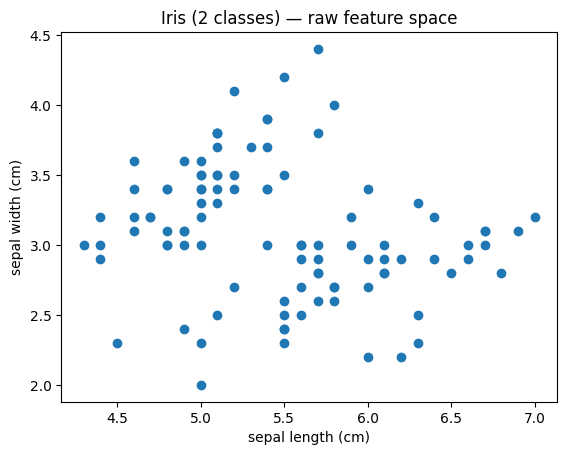

In [ ]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title("Iris (2 classes) — raw feature space")
plt.show()

### Review Questions

1. What does each point represent in the scatter plot?
2. Why did we restrict to two classes and two features for this first experiment?
3. In your own words, what does a **classification boundary** mean?

**Your answers:**

## 2) Train a Linear SVM

We'll use `LinearSVC` for linear classification. It is fast for many problems.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

# Linear SVM WITHOUT scaling (not recommended)
lin_no_scale = LinearSVC(C=1.0, random_state=42, max_iter=50_000)
lin_no_scale.fit(X_train, y_train)

pred_no_scale = lin_no_scale.predict(X_test)
print(f"Accuracy (no scaling): {accuracy_score(y_test, pred_no_scale)}")

Accuracy (no scaling): 0.96


## 3) Soft margin and the role of **C**

For linear SVMs:
- **Small `C`** → more regularization → wider margin, more violations allowed.
- **Large `C`** → less regularization → tries to classify training points correctly, narrower margin.

We'll compare a few values of `C` and see how the training/test accuracy changes.


In [ ]:
Cs = [0.01, 0.1, 1.0, 10.0, 100.0]
results = []

for C in Cs:
    model = Pipeline([
        ("scaler", StandardScaler()),
        ("svm", LinearSVC(C=C, random_state=42, max_iter=50_000))
    ])
    model.fit(X_train, y_train)
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    results.append((C, train_acc, test_acc))

pd.DataFrame(results, columns=["C", "train_accuracy", "test_accuracy"])

,C,train_accuracy,test_accuracy
0,0.01,1.0,0.96
1,0.10,1.0,0.96
2,1.00,1.0,0.96
3,10.00,1.0,0.96
4,100.00,1.0,0.96


### Review Questions
1. As `C` increases, what typically happens to **training accuracy**?
2. Did test accuracy always increase with larger `C`? Why might it not?
3. In one sentence, explain the **bias–variance** intuition behind `C`.

**Your answers:**


## 4) When data isn't linearly separable: a nonlinear dataset (moons)

Many real datasets cannot be separated by a straight line.  
We'll generate a simple nonlinear dataset and visualize it.


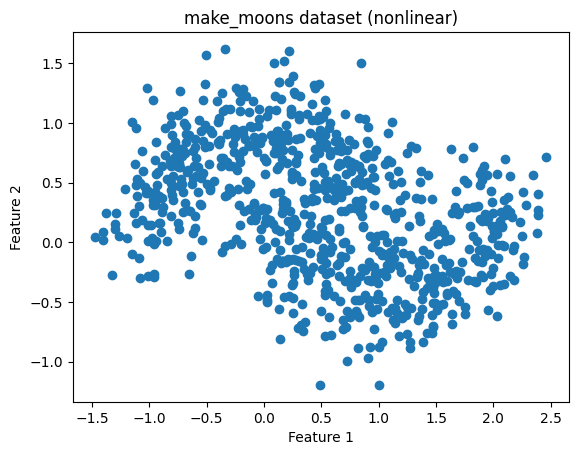

,count
1,400
0,400


In [ ]:
X_moons, y_moons = make_moons(n_samples=800, noise=0.25, random_state=42)

plt.figure()
plt.scatter(X_moons[:, 0], X_moons[:, 1])
plt.title("make_moons dataset (nonlinear)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

pd.Series(y_moons).value_counts()

### Review Questions
1. Why would a linear classifier struggle on this dataset?

**Your answer:**


## 5) Kernel SVM (RBF): understanding `gamma` and `C`

A **kernel SVM** can create nonlinear boundaries by implicitly mapping data into higher-dimensional spaces.

For the RBF kernel:
- `gamma` controls how "wiggly" the boundary can be (influence radius of points).
- `C` controls the soft margin (regularization).

We'll train a few models and compare metrics.


In [11]:
Xm_train, Xm_test, ym_train, ym_test = train_test_split(
    X_moons, y_moons, test_size=0.25, stratify=y_moons, random_state=42
)

def train_eval_svc(C, gamma):
    model = Pipeline([
        ("scaler", StandardScaler()),
        ("svm", SVC(kernel="rbf", C=C, gamma=gamma, random_state=42))
    ])
    model.fit(Xm_train, ym_train)
    return model.score(Xm_train, ym_train), model.score(Xm_test, ym_test)

settings = [(0.1, 0.1), (1.0, 0.1), (1.0, 1.0), (10.0, 0.1), (10.0, 1.0), (10.0, 5.0), (100.0, 50.0)]
rows = []
for C, gamma in settings:
    tr, te = train_eval_svc(C, gamma)
    rows.append((C, gamma, tr, te))

pd.DataFrame(rows, columns=["C", "gamma", "train_accuracy", "test_accuracy"])

,C,gamma,train_accuracy,test_accuracy
0,0.1,0.1,0.856667,0.900
1,1.0,0.1,0.876667,0.920
2,1.0,1.0,0.945000,0.965
3,10.0,0.1,0.915000,0.935
4,10.0,1.0,0.946667,0.955
5,10.0,5.0,0.953333,0.950
6,100.0,50.0,1.000000,0.910


### Review Questions
1. What tends to happen when you increase `gamma` (keeping `C` fixed)?
2. What tends to happen when you increase `C` (keeping `gamma` fixed)?
3. Which combinations show signs of **overfitting**? Explain your evidence using train vs test accuracy.

**Your answers:**


## 6) Chapter 5 Takeaways (Checklist)

You should now be able to explain:

- **Margin:** SVM tries to separate classes with the largest possible margin.  
- **Support vectors:** The training points that influence the boundary the most.  
- **Soft margin (`C`):** Controls the tradeoff between a wide margin and classification errors.  
- **Scaling:** Almost always necessary for SVMs.  
- **Kernels:** Enable nonlinear boundaries (RBF and polynomial are common).  
- **`gamma` (RBF):** Controls locality / boundary complexity; larger = more complex.  

